In [58]:
import warnings

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from jre_utils.config import asset_types
from jre_utils.visualize import plot_time_series
from jre_utils.process import get_cumulative_growth, get_cumulative_growth_from_base

from jre_utils.datapath import model_ready_data_paths, DATA_DIRECTORY_PATH

warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", None)

In [41]:
asset_type = "combined"
dataset_key = "transactions"
years_ahead = 2

metrics = {
    "median": "unit_price_median",
    "gmean": "unit_price_gmean",
}

granularity_columns = ["area", "area_code"]
group_by_columns = granularity_columns + ["year"]

metric_key = "gmean"
metric = metrics[metric_key]
metric_pct_chg = metric + "_pct_chg"

normalized_metric_pct_chg = metric_pct_chg + "_normalized_yearly"

In [42]:
investment_asset_type = "building"

In [43]:
start_year = 2007
eval_start_year = 2021  # eval_years = [2020, 2021, 2022]
eval_end_year = 2022

dataset_name = f"sequence_{dataset_key}_{asset_type}_{metric_key}_{years_ahead}"
output_dataset_name = f"{dataset_name}_{eval_start_year}"
model_ready_data_path = model_ready_data_paths[dataset_name]

In [44]:
df = pd.read_csv(model_ready_data_path)
df["noise"] = np.random.normal(0, 1, df.shape[0])

In [45]:
model_ready_data_path

'../../data/model_ready/sequence_transactions_combined_gmean_2.csv'

In [53]:
factor_column = "net_migration_ratio"
test_df = df[
    ["year", "area_code"] 
    + [f"{investment_asset_type}_yearly_price_growth", factor_column, "noise"]
]
test_df = test_df.dropna()

In [57]:
test_df

,year,area_code,building_yearly_price_growth,net_migration_ratio,noise
3,2010,23441,-0.019251,0.021522,-0.394526
4,2011,23441,0.010080,0.020763,0.099353
5,2012,23441,0.027191,0.012503,1.173589
6,2013,23441,0.080401,0.014376,-1.600209
7,2014,23441,-0.179787,0.015953,-0.951264
...,...,...,...,...,...
18537,2018,19205,-0.340122,-0.006363,0.893487
18538,2019,19205,0.158028,-0.004140,0.930864
18539,2020,19205,-0.317262,-0.000927,-0.553750
18540,2021,19205,0.268547,-0.002338,0.264021


In [66]:
# Use data from 2010 to 2022
# Drop any areas with missing data
migration_data_complete = pd.DataFrame()
test_df = test_df[test_df["year"] >= 2010]

for area_code in test_df["area_code"].unique():
    area_df = test_df[test_df["area_code"] == area_code]
    if area_df.shape[0] == 13:
        migration_data_complete = pd.concat([migration_data_complete, area_df])

In [68]:
migration_data_complete.round(5)

,year,area_code,building_yearly_price_growth,net_migration_ratio,noise
3,2010,23441,-0.01925,0.02152,-0.39453
4,2011,23441,0.01008,0.02076,0.09935
5,2012,23441,0.02719,0.01250,1.17359
6,2013,23441,0.08040,0.01438,-1.60021
7,2014,23441,-0.17979,0.01595,-0.95126
...,...,...,...,...,...
18537,2018,19205,-0.34012,-0.00636,0.89349
18538,2019,19205,0.15803,-0.00414,0.93086
18539,2020,19205,-0.31726,-0.00093,-0.55375
18540,2021,19205,0.26855,-0.00234,0.26402


In [69]:
migration_data_complete.round(5).to_csv(f"{DATA_DIRECTORY_PATH}/r/building_migration.csv", index=False)

In [ ]:
# factor_data <- read.csv("building_migration.csv")
# factor_data$rnoise <- rnorm(nrow(factor_data), mean = 0, sd = 1)
# py <- data.frame(split(factor_data$building_yearly_price_growth, factor_data$area_code))
# fy <- data.frame(split(factor_data$net_migration_ratio, factor_data$area_code))
# ny <- data.frame(split(factor_data$noise, factor_data$area_code))
# rny <- data.frame(split(factor_data$rnoise, factor_data$area_code))

# purtest(py, test="levinlin", lags=3)
# purtest(fy, test="levinlin", lags=3)
# purtest(ny, test="levinlin", lags=3)
# purtest(rny, test="levinlin", lags=3)

# purtest(py, test="ips", exo="intercept", lags=3)
# purtest(fy, test="ips", exo="intercept", lags=3)
# purtest(ny, test="ips", exo="intercept", lags=3)
# purtest(rny, test="ips", exo="intercept", lags=3)


<Axes: ylabel='Frequency'>

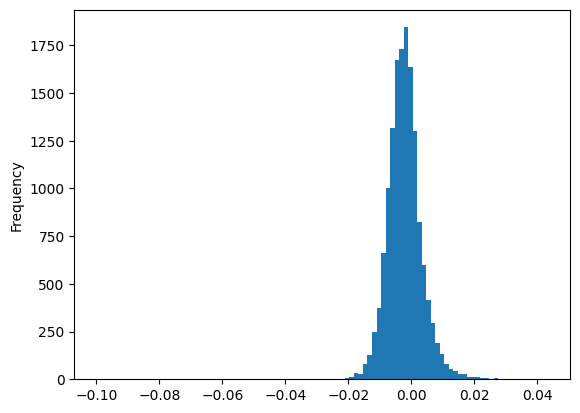

In [62]:
migration_data_complete["net_migration_ratio"].plot(kind="hist", bins=100)

In [63]:
migration_data_complete.describe()


,year,area_code,building_yearly_price_growth,net_migration_ratio,noise
count,14846.000000,14846.000000,14846.000000,14846.000000,14846.000000
mean,2016.000000,21827.603327,0.054448,-0.002108,0.001303
std,3.741783,13309.215996,0.556885,0.005589,1.004098
min,2010.000000,1100.000000,-0.938191,-0.099818,-3.964443
25%,2013.000000,11228.000000,-0.142958,-0.005460,-0.674810
50%,2016.000000,21214.500000,-0.003305,-0.002307,-0.003555
75%,2019.000000,32205.000000,0.141493,0.000798,0.677286
max,2022.000000,47362.000000,42.673283,0.043446,3.700756


In [ ]:
# Testing Grunfeld data in R
# library(plm)
# data(Grunfeld)
# Grunfeld$noise <- rnorm(nrow(Grunfeld), mean = 0, sd = 1)
# y <- data.frame(split(Grunfeld$inv, Grunfeld$firm))
# ny <- data.frame(split(Grunfeld$noise, Grunfeld$firm))
# purtest(y, test="levinlin", lags=4)
# purtest(ny, test="levinlin", lags=4)


In [ ]:
# factor_data <- read.csv("building_migration.csv")
# factor_data$rnoise <- rnorm(nrow(factor_data), mean = 0, sd = 1)
# py <- data.frame(split(factor_data$building_yearly_price_growth, factor_data$area_code))
# fy <- data.frame(split(factor_data$net_migration_ratio, factor_data$area_code))
# ny <- data.frame(split(factor_data$noise, factor_data$area_code))
# rny <- data.frame(split(factor_data$rnoise, factor_data$area_code))

# purtest(py, test="levinlin", lags=3)
# purtest(fy, test="levinlin", lags=3)
# purtest(ny, test="levinlin", lags=3)
# purtest(rny, test="levinlin", lags=3)

# purtest(py, test="ips", exo="intercept", lags=3)
# purtest(fy, test="ips", exo="intercept", lags=3)
# purtest(ny, test="ips", exo="intercept", lags=3)
# purtest(rny, test="ips", exo="intercept", lags=3)


In [ ]:
# factor_pdata <- pdata.frame(factor_data, index = c("area_code", "year"))